In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

if response.status_code != 200:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")
    table_index = None
    for index, table in enumerate(tables):
        if "Tesla Quarterly Revenue" in str(table):
            table_index = index
            break
    if table_index is not None:
        rows = tables[table_index].find_all("tr")
        tesla_revenue = []
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                tesla_revenue.append({"Date": date, "Revenue": revenue})
        tesla_revenue = pd.DataFrame(tesla_revenue)

tesla_revenue.tail()

,Date,Revenue
58,2010-06-30,$28
59,2010-03-31,$21
60,2009-12-31,
61,2009-09-30,$46
62,2009-06-30,$27


In [3]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
if response.status_code != 200:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")
    table_index = None

    for index, table in enumerate(tables):
        if "GameStop Quarterly Revenue" in str(table):
            table_index = index
            break
    if table_index is not None:
        rows = tables[table_index].find_all("tr")
        gme_revenue = []

        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                gme_revenue.append({"Date": date, "Revenue": revenue})

        gme_revenue = pd.DataFrame(gme_revenue)
gme_revenue.tail()

,Date,Revenue
59,2010-01-31,"$3,524"
60,2009-10-31,"$1,835"
61,2009-07-31,"$1,739"
62,2009-04-30,"$1,981"
63,2009-01-31,"$3,492"


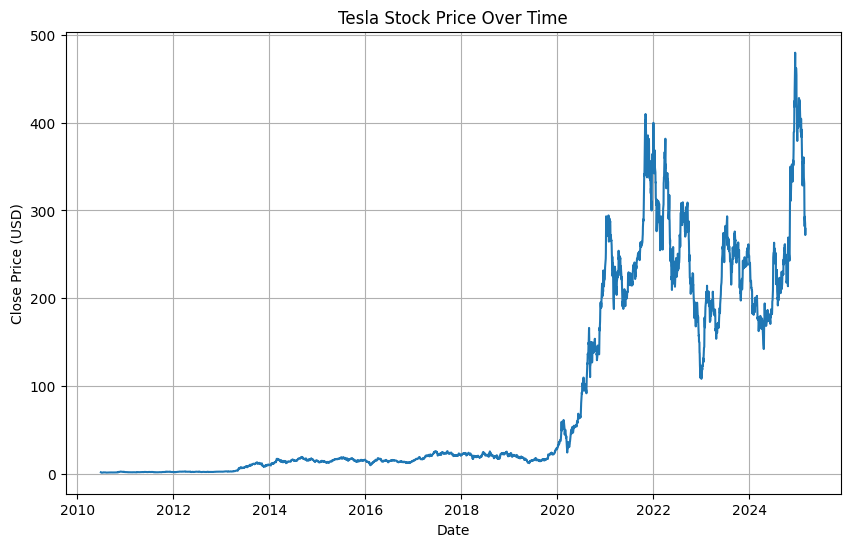

In [9]:
import matplotlib.pyplot as plt
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.grid(True)
    plt.show()

make_graph(tesla_data, title="Tesla Stock Price Over Time")